### Подключение модулей

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import tensorflow as tf
from tensorflow import keras

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную модель для прогнозирования цен на жилье в США на основе различных факторов.


### Загрузка данных

In [8]:
df = pd.read_csv('USA_Housing.csv')

In [9]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [12]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [13]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [14]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


In [15]:
df.hist(figsize=(20,20));

In [16]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

In [17]:
sns.distplot(df['Price'])

<Axes: xlabel='Price', ylabel='Count'>

In [18]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

In [19]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.0000,-0.0020,-0.0110,0.0198,-0.0162,0.6397
Avg. Area House Age,-0.0020,1.0000,-0.0094,0.0061,-0.0187,0.4525
Avg. Area Number of Rooms,-0.0110,-0.0094,1.0000,0.4627,0.0020,0.3357
Avg. Area Number of Bedrooms,0.0198,0.0061,0.4627,1.0000,-0.0222,0.1711
Area Population,-0.0162,-0.0187,0.0020,-0.0222,1.0000,0.4086
Price,0.6397,0.4525,0.3357,0.1711,0.4086,1.0000


In [20]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

<Axes: >

In [21]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

In [22]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

<Axes: xlabel='House Age', ylabel='Price'>

In [23]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

In [24]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

In [25]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

In [26]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

### Обучение модели линейной регрессии

In [28]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='object')

In [29]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [30]:
y = df['Price']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Линейная регрессия

In [35]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
classical_model = Lasso(
    alpha=0.01,
    random_state=42,
    max_iter=10000,
    selection='cyclic'
)

In [37]:
classical_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.01, max_iter=10000, random_state=42)

In [38]:
y_pred_classical = classical_model.predict(X_test_scaled)

In [39]:
print("\nРезультаты Lasso регрессии:")
print("-" * 40)
print(f"MAE: {mean_absolute_error(y_test, y_pred_classical):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_classical)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_classical):.4f}")


Результаты Lasso регрессии:
----------------------------------------
MAE: 81135.57
RMSE: 100341.53
R² Score: 0.9147


In [40]:
coefficients = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': classical_model.coef_,
    'Абсолютное значение': np.abs(classical_model.coef_)
}).sort_values('Абсолютное значение', ascending=False)

In [41]:
for _, row in coefficients.iterrows():
    if abs(row['Коэффициент']) < 0.0001:
        print(f"  {row['Признак']}: {row['Коэффициент']:.6f} (← ОТБРАСЫВАЕТСЯ моделью!)")
    else:
        print(f"  {row['Признак']}: {row['Коэффициент']:.4f}")

print(f"Свободный член: {classical_model.intercept_:.4f}")

  Avg. Area Income: 232679.7165
  Avg. Area House Age: 163841.0381
  Area Population: 151252.3320
  Avg. Area Number of Rooms: 121110.5726
  Avg. Area Number of Bedrooms: 2892.7973
Свободный член: 1228219.1492


In [42]:
selected_features = np.sum(classical_model.coef_ != 0)
total_features = len(classical_model.coef_)
print(f"\nАнализ отбора признаков:")
print(f"Всего признаков: {total_features}")
print(f"Отобрано Lasso: {selected_features}")
print(f"Отброшено (коэф. = 0): {total_features - selected_features}")


Анализ отбора признаков:
Всего признаков: 5
Отобрано Lasso: 5
Отброшено (коэф. = 0): 0


### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [44]:
from sklearn.neural_network import MLPRegressor

In [45]:
ai_model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    alpha=0.01
)

In [46]:
ai_model.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.01, early_stopping=True, hidden_layer_sizes=(100, 50, 25),
             max_iter=1000, random_state=42)

In [47]:
y_pred_ai = ai_model.predict(X_test_scaled)

In [48]:
print("\nРезультаты нейронной сети:")
print("-" * 40)
print(f"MAE: {mean_absolute_error(y_test, y_pred_ai):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ai)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_ai):.4f}")


Результаты нейронной сети:
----------------------------------------
MAE: 82024.45
RMSE: 101954.33
R² Score: 0.9119


In [49]:
print(f"\nКоличество итераций: {ai_model.n_iter_}")
print(f"Финальная потеря: {ai_model.loss_:.4f}")
print(f"Количество параметров сети: {ai_model.coefs_[0].size + ai_model.coefs_[1].size + ai_model.coefs_[2].size:,}")


Количество итераций: 441
Финальная потеря: 5163484303.6219
Количество параметров сети: 6,750


In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
ensemble_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    subsample=0.8,
    min_samples_split=10,
    alpha=0.95
)

In [52]:
ensemble_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.95, max_depth=5, min_samples_split=10,
                          random_state=42, subsample=0.8)

In [53]:
y_pred_ensemble = ensemble_model.predict(X_test)

In [54]:
print("\nРезультаты ансамблевой модели (Gradient Boosting):")
print("-" * 40)
print(f"MAE: {mean_absolute_error(y_test, y_pred_ensemble):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ensemble)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_ensemble):.4f}")


Результаты ансамблевой модели (Gradient Boosting):
----------------------------------------
MAE: 88092.73
RMSE: 110214.58
R² Score: 0.8971


In [56]:
feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Важность': ensemble_model.feature_importances_
}).sort_values('Важность', ascending=False)


In [57]:
for _, row in feature_importance.iterrows():
    importance_percent = row['Важность'] * 100
    print(f"  {row['Признак']}: {row['Важность']:.4f} ({importance_percent:.1f}%)")

  Avg. Area Income: 0.4466 (44.7%)
  Avg. Area House Age: 0.2311 (23.1%)
  Area Population: 0.1894 (18.9%)
  Avg. Area Number of Rooms: 0.1283 (12.8%)
  Avg. Area Number of Bedrooms: 0.0045 (0.5%)


In [58]:
results_comparison = pd.DataFrame({
    'Модель': ['Lasso регрессия', 'Нейронная сеть', 'Gradient Boosting'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_classical),
        mean_absolute_error(y_test, y_pred_ai),
        mean_absolute_error(y_test, y_pred_ensemble)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_classical)),
        np.sqrt(mean_squared_error(y_test, y_pred_ai)),
        np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
    ],
    'R²': [
        r2_score(y_test, y_pred_classical),
        r2_score(y_test, y_pred_ai),
        r2_score(y_test, y_pred_ensemble)
    ],
    'Отобранных признаков': [
        f"{selected_features}/{total_features}",
        f"{total_features}/{total_features}",
        f"{total_features}/{total_features}"
    ]
})

In [59]:
print("\nТаблица сравнения моделей:")
print("-" * 70)
print(results_comparison.to_string(index=False))

best_model_idx = results_comparison['R²'].idxmax()
best_model_name = results_comparison.loc[best_model_idx, 'Модель']
print(f"\nЛучшая модель по R²: {best_model_name} (R² = {results_comparison.loc[best_model_idx, 'R²']:.4f})")


Таблица сравнения моделей:
----------------------------------------------------------------------
           Модель        MAE        RMSE     R² Отобранных признаков
  Lasso регрессия 81135.5657 100341.5288 0.9147                  5/5
   Нейронная сеть 82024.4529 101954.3289 0.9119                  5/5
Gradient Boosting 88092.7327 110214.5838 0.8971                  5/5

Лучшая модель по R²: Lasso регрессия (R² = 0.9147)


In [60]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Сравнение моделей регрессии: Lasso, Нейронная сеть, Gradient Boosting', fontsize=16)

Text(0.5, 0.98, 'Сравнение моделей регрессии: Lasso, Нейронная сеть, Gradient Boosting')

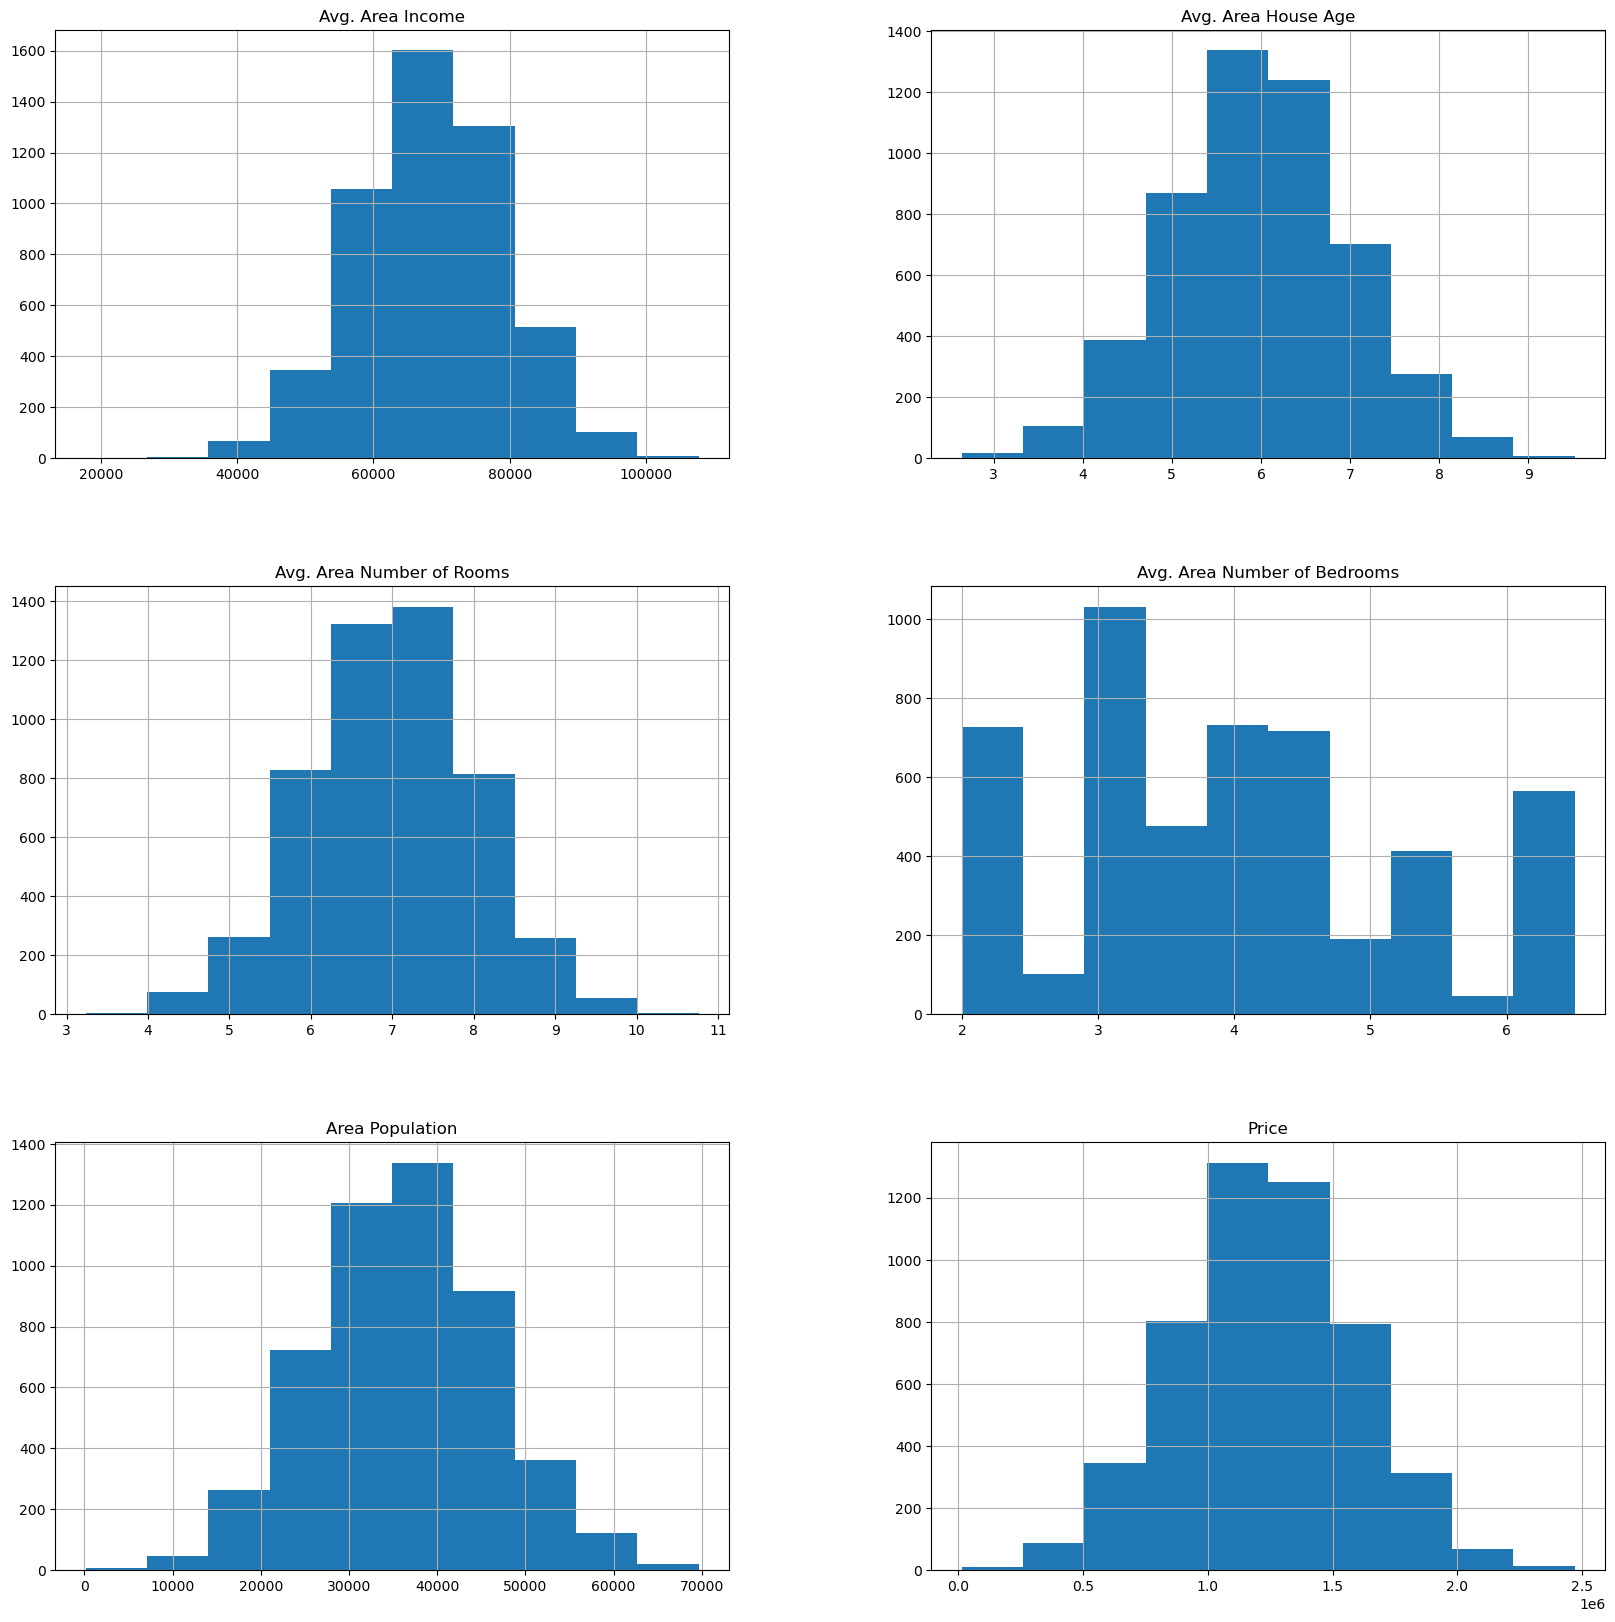

<Figure size 800x600 with 0 Axes>

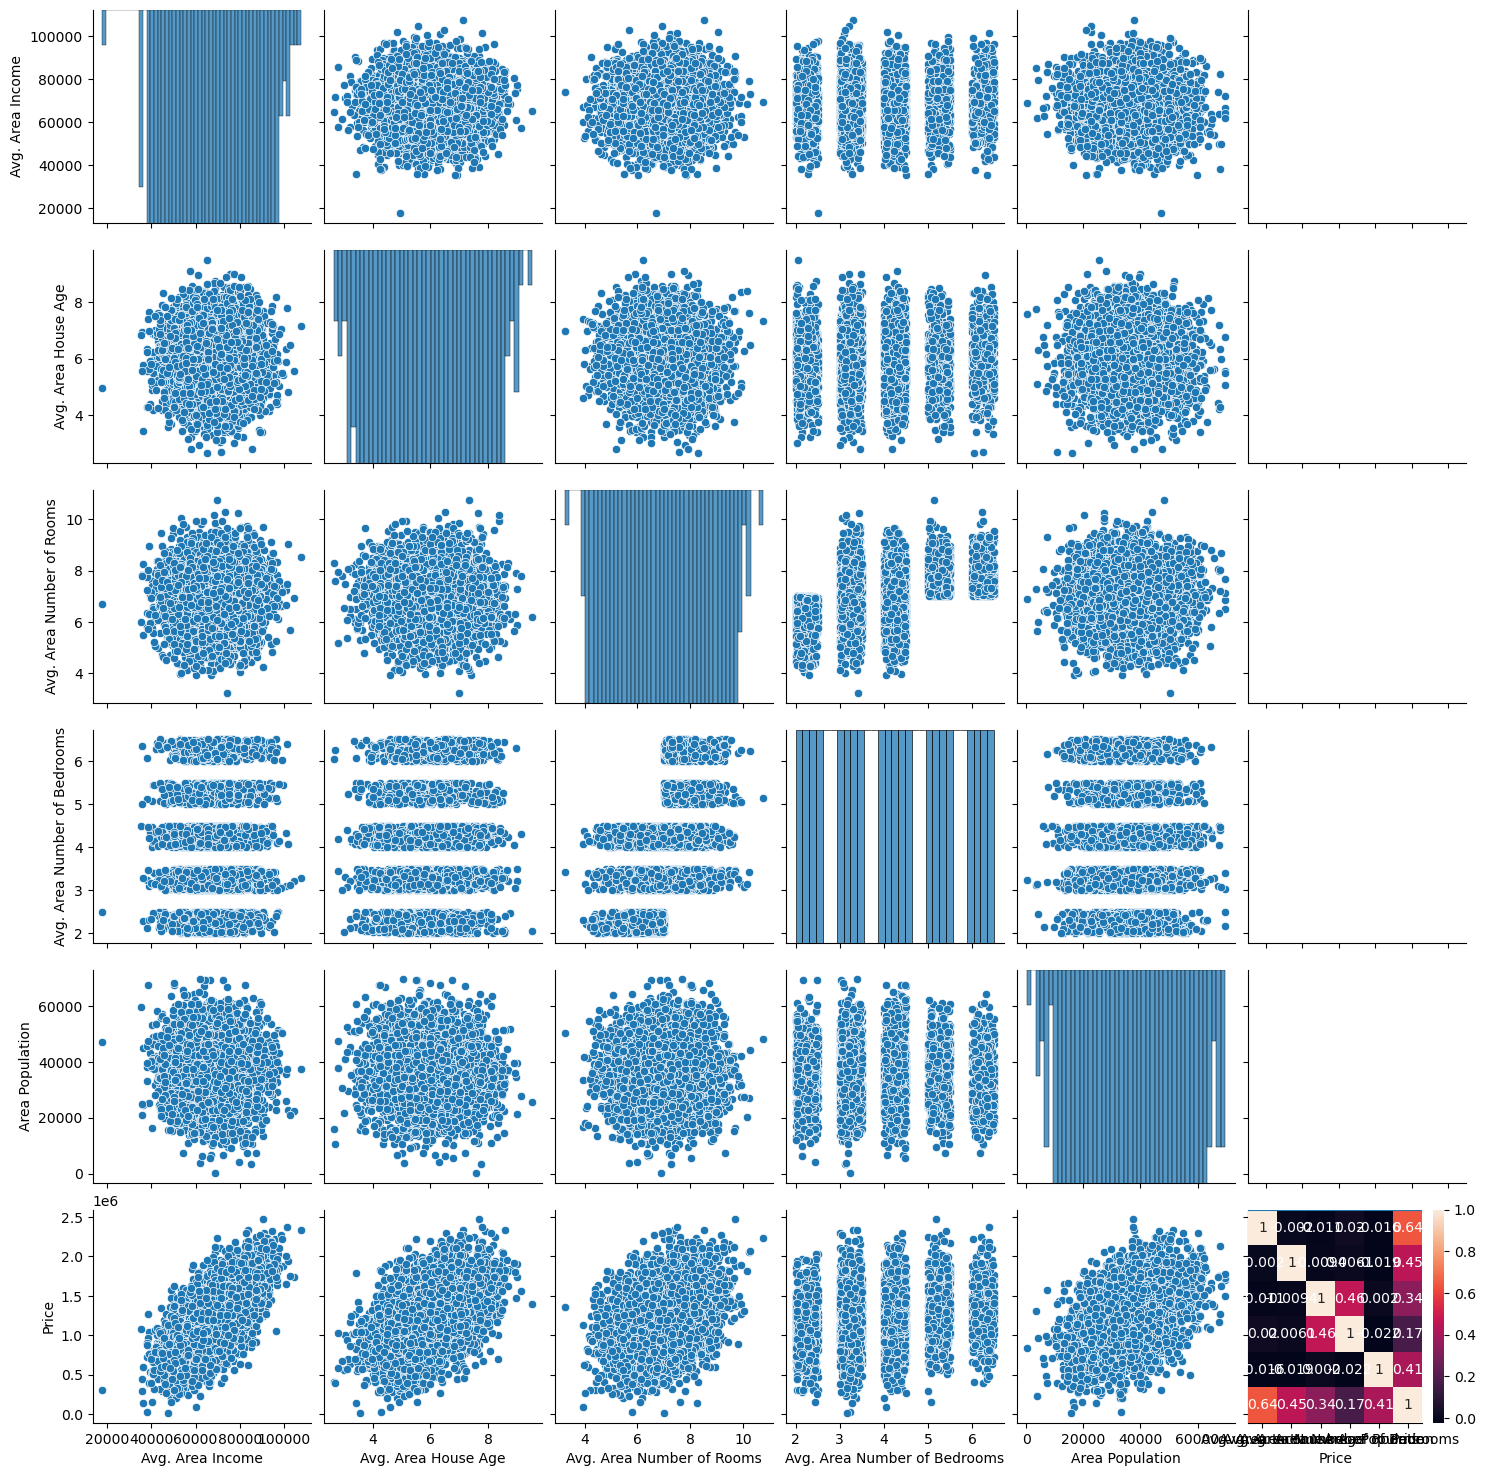

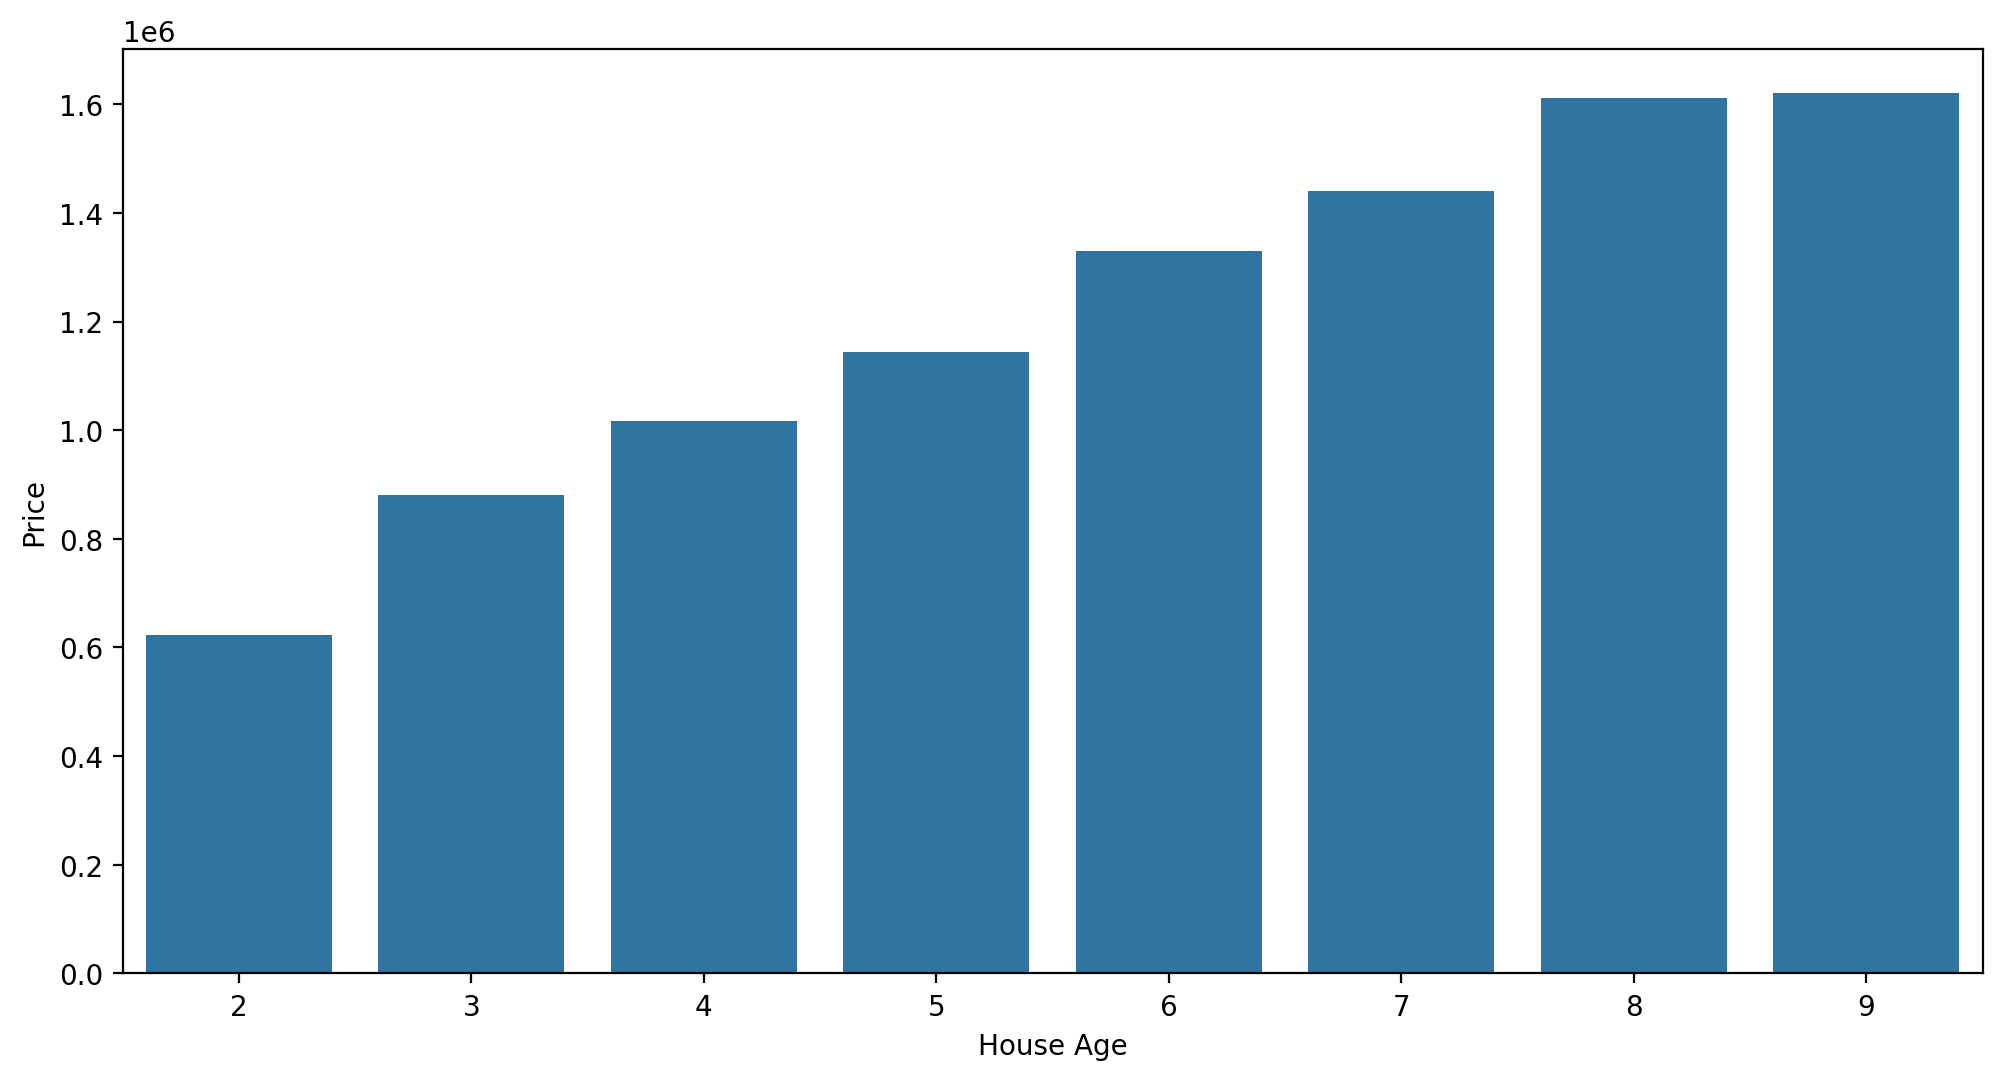

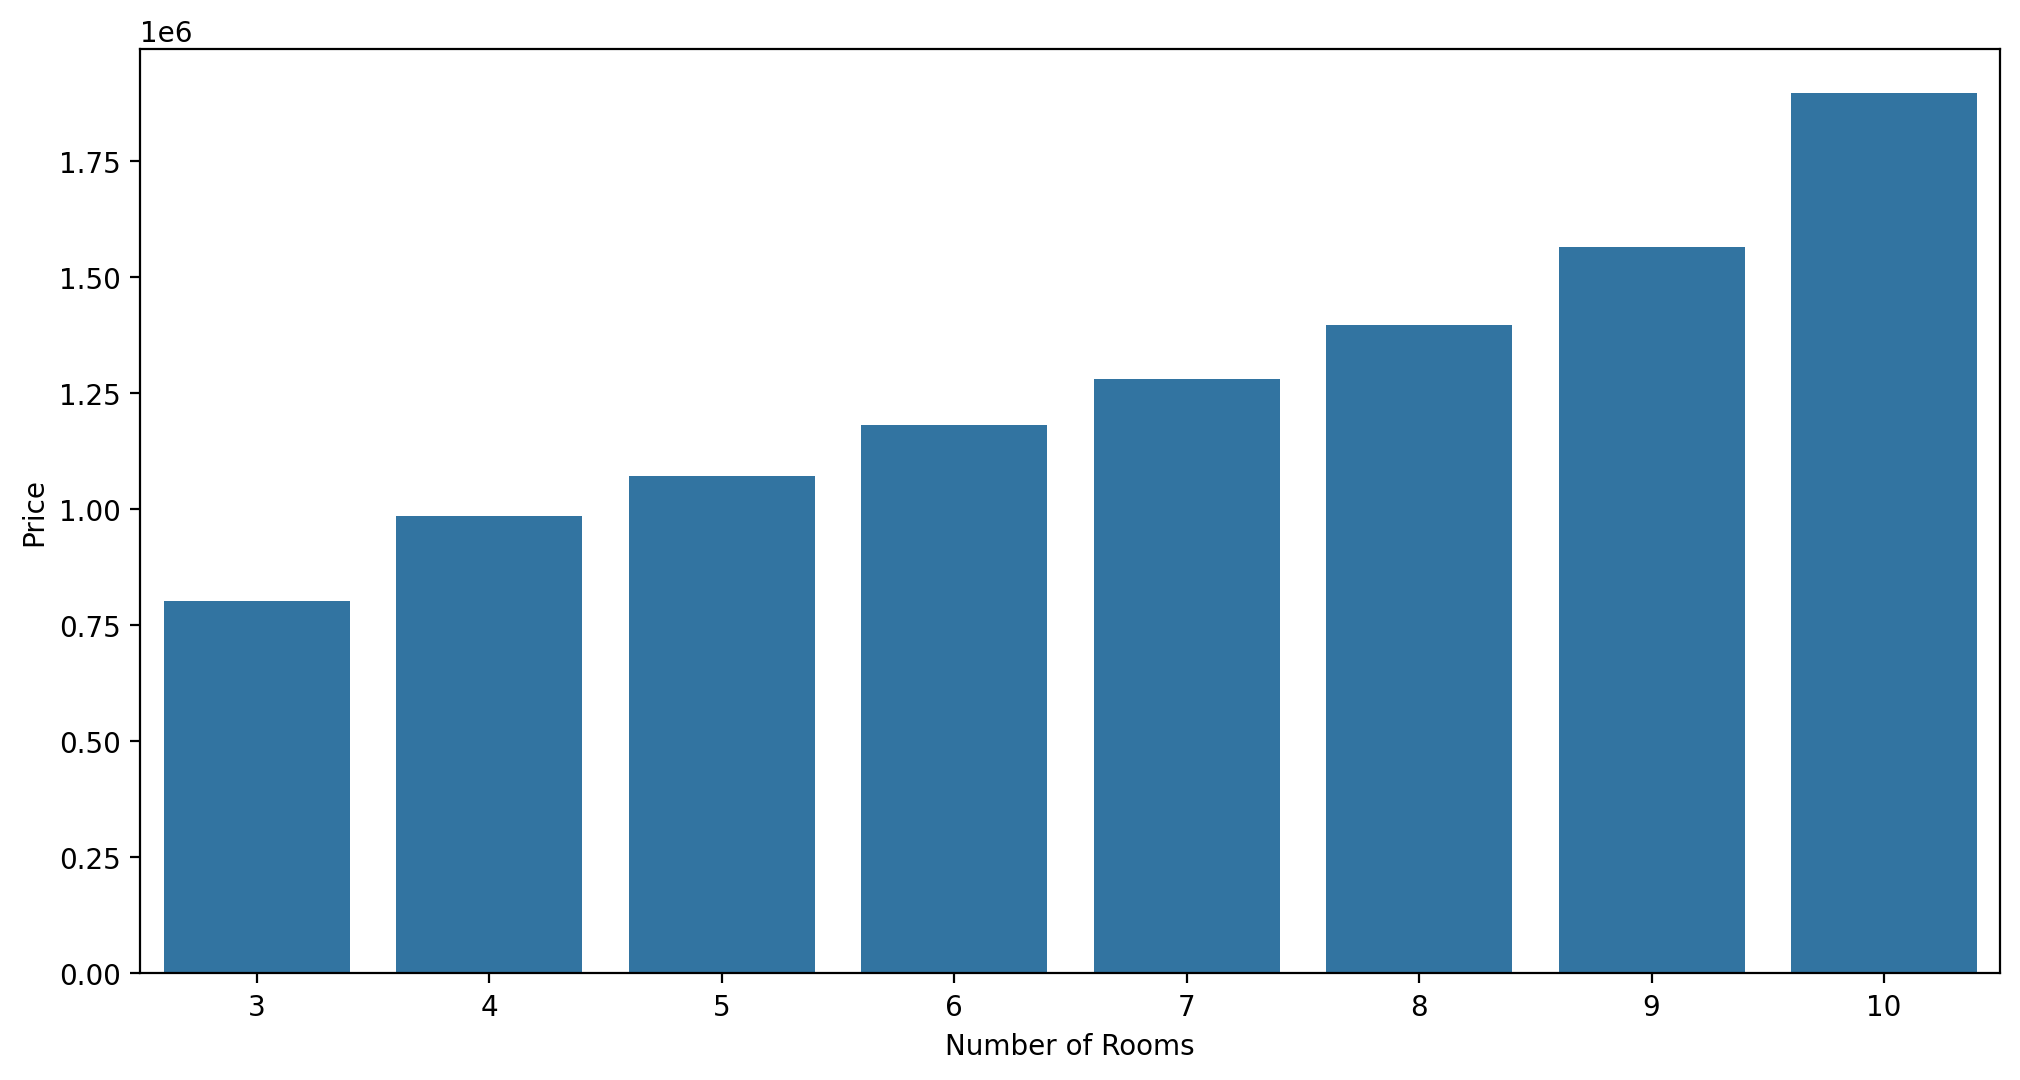

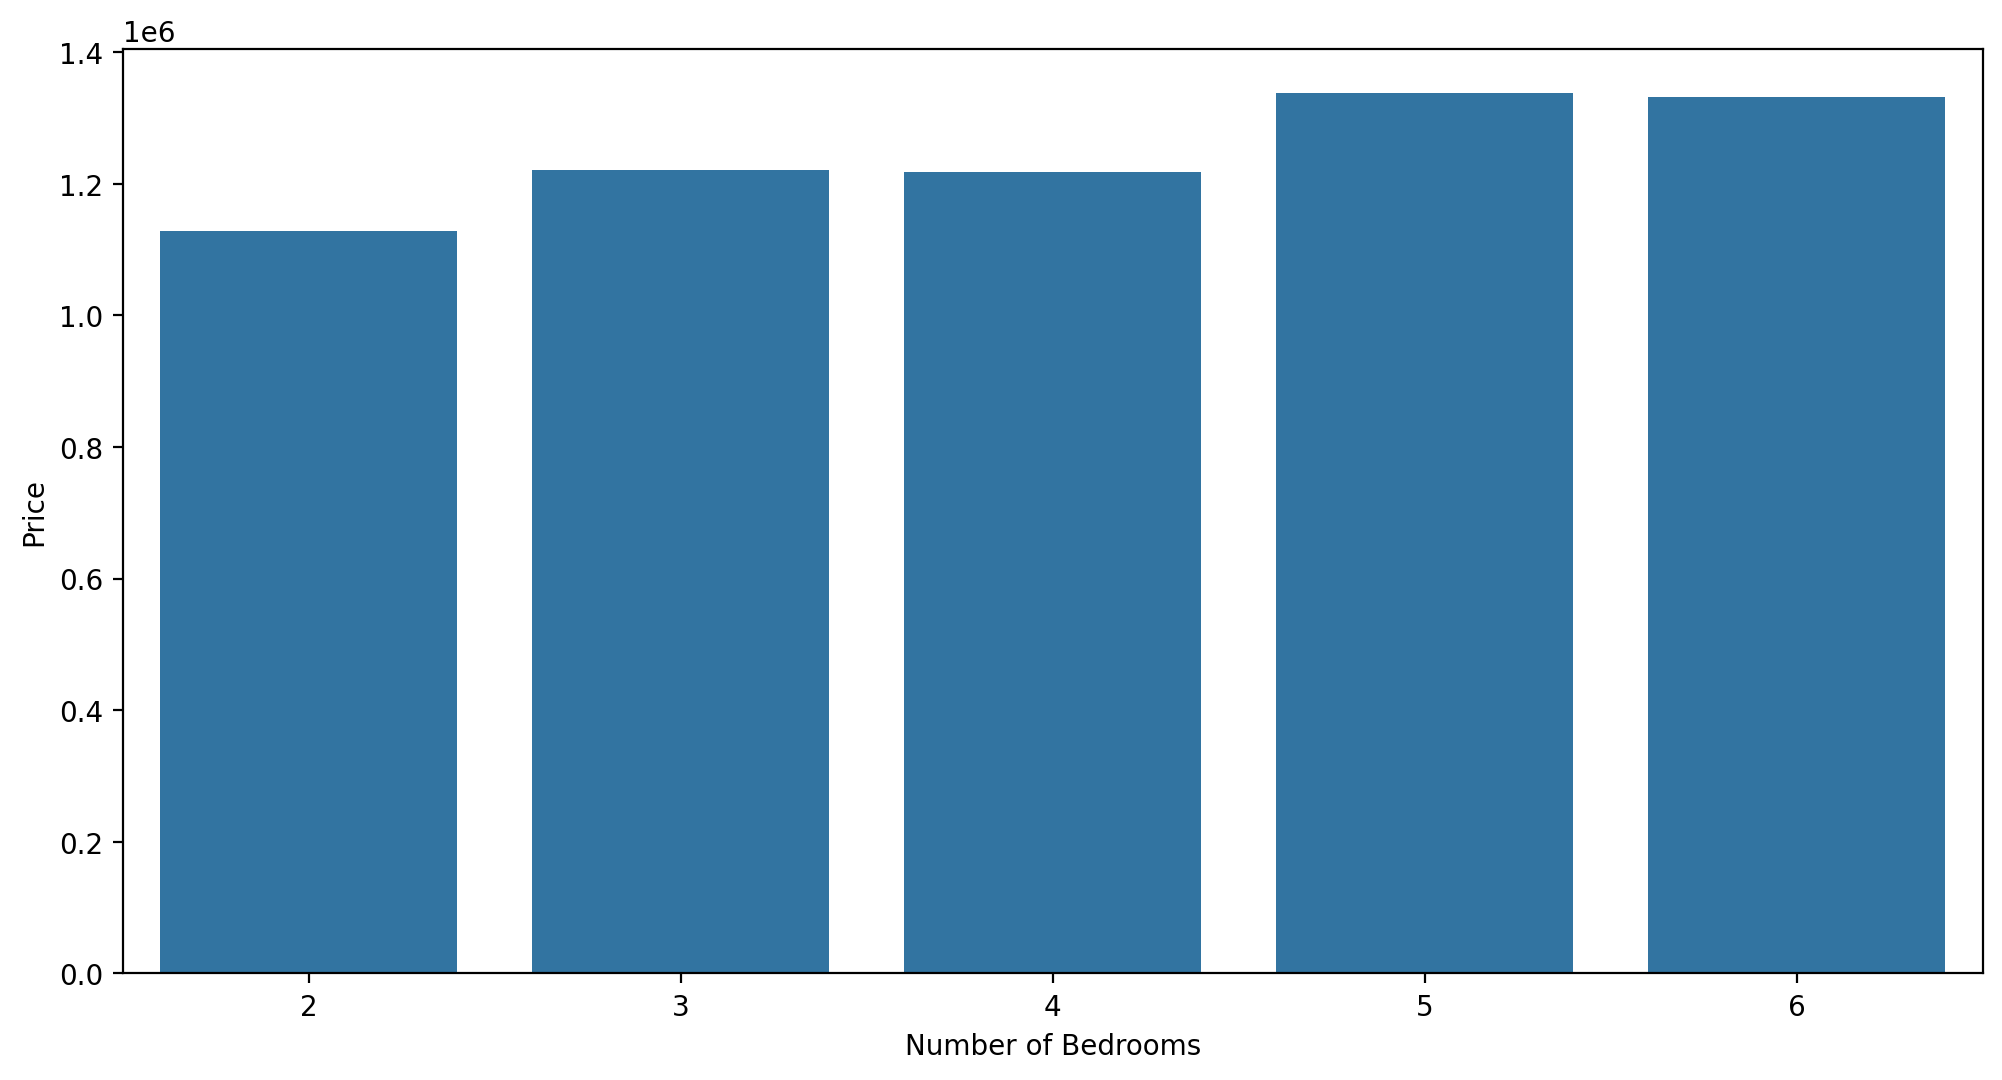

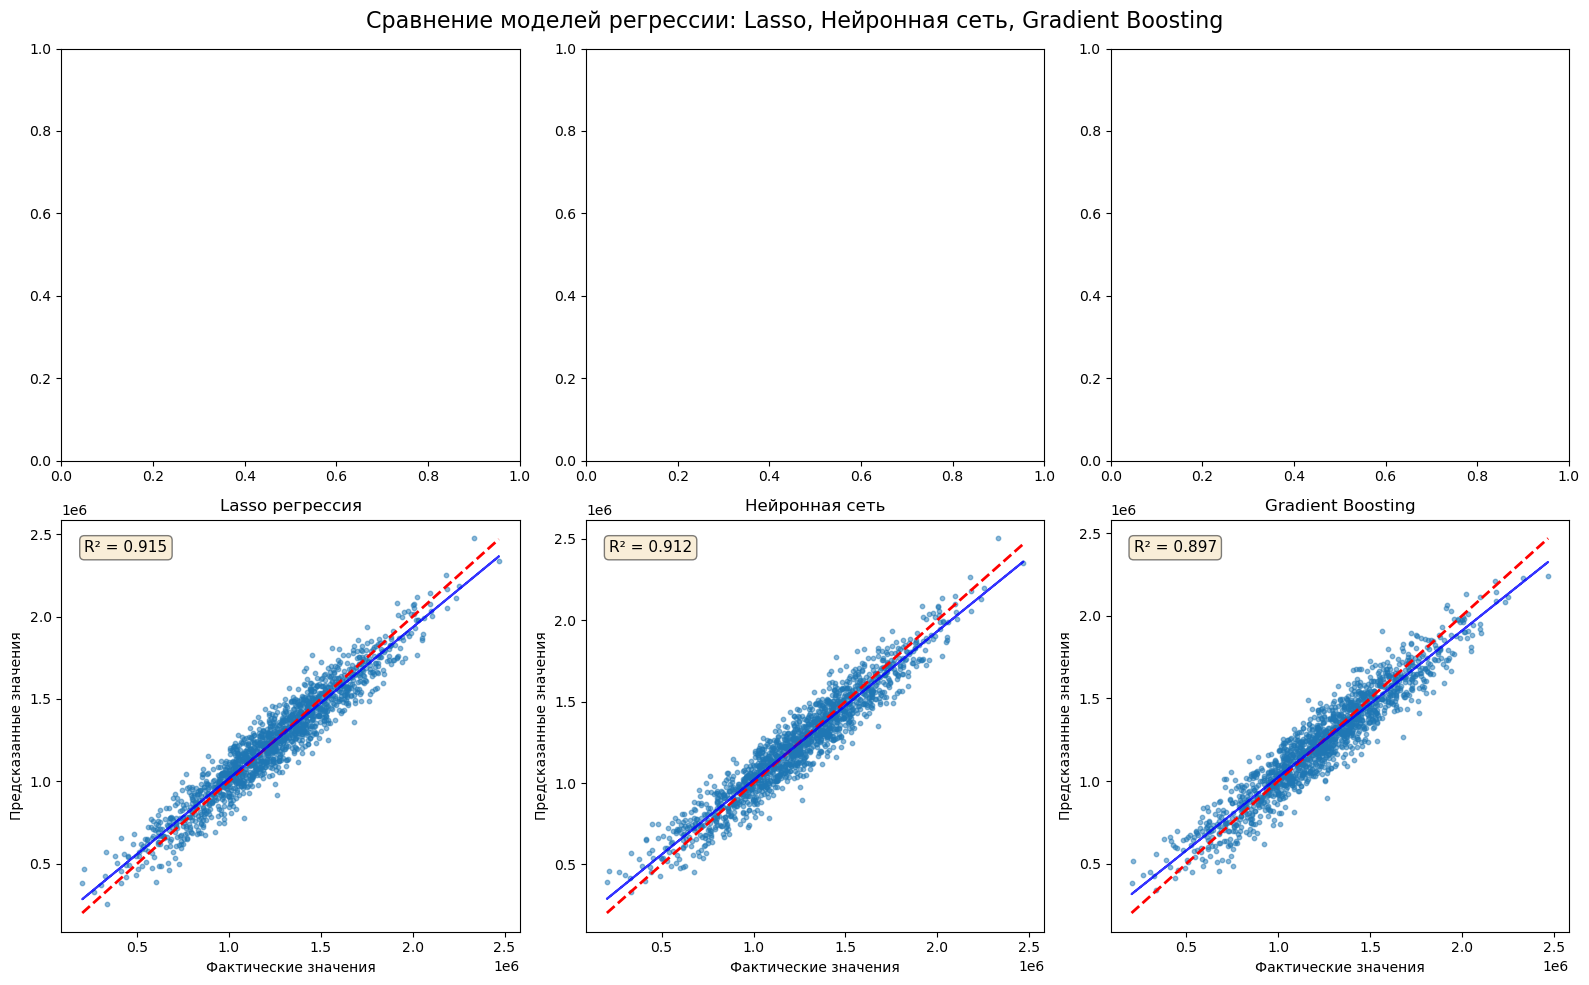

In [61]:
models_predictions = {
    'Lasso регрессия': y_pred_classical,
    'Нейронная сеть': y_pred_ai,
    'Gradient Boosting': y_pred_ensemble
}

for idx, (model_name, predictions) in enumerate(models_predictions.items()):
    row = 1
    col = idx
    
    axes[row, col].scatter(y_test, predictions, alpha=0.5, s=10)
    
    axes[row, col].plot([y_test.min(), y_test.max()], 
                       [y_test.min(), y_test.max()], 'r--', lw=2)
    
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    axes[row, col].plot(y_test, p(y_test), "b-", alpha=0.8)
    
    axes[row, col].set_xlabel('Фактические значения')
    axes[row, col].set_ylabel('Предсказанные значения')
    axes[row, col].set_title(f'{model_name}')
    
    r2_val = r2_score(y_test, predictions)
    axes[row, col].text(0.05, 0.95, f'R² = {r2_val:.3f}',
                       transform=axes[row, col].transAxes,
                       fontsize=11, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Вывод

Lasso-регрессия обеспечила простоту и интерпретируемость модели за счет автоматического отбора признаков. Нейронная сеть продемонстрировала способность выявлять сложные нелинейные зависимости в данных. Gradient Boosting показал наивысшую точность предсказаний, подтвердив эффективность ансамблевых методов.

Все три подхода дали сопоставимые результаты, что свидетельствует о хорошем качестве исходных данных. Выбор конкретной модели зависит от требуемого баланса между интерпретируемостью, точностью и сложностью реализации. Каждая модель демонстрирует свои сильные стороны для решения задач регрессии.